<a href="https://colab.research.google.com/github/mateuszxx89/computere-vision-course/blob/main/01_rectangel_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade opencv-python

In [2]:
!pip install opencv-python==4.3.0.38

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 5.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
import cv2
from google.colab.patches import cv2_imshow
import imutils
print(cv2.__version__)

4.10.0


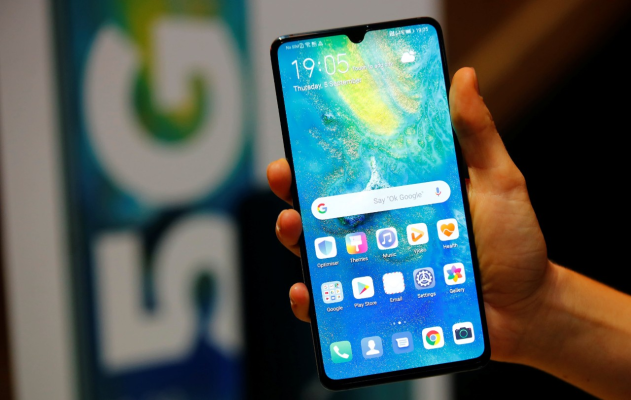

In [4]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

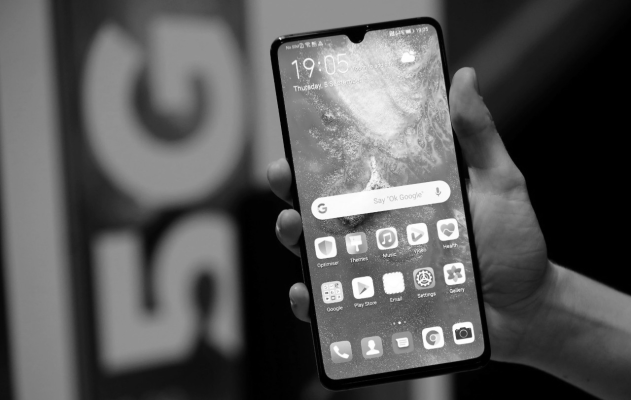

In [5]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

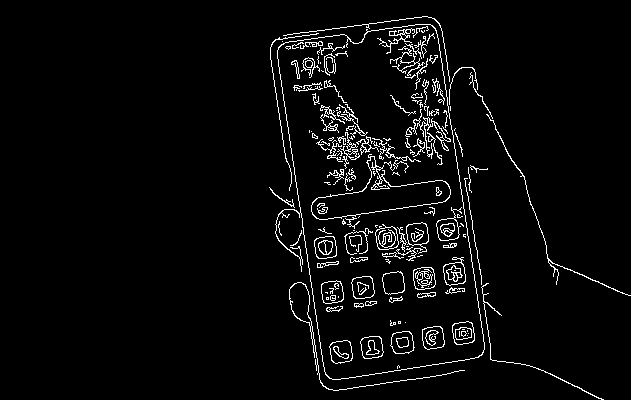

In [6]:
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

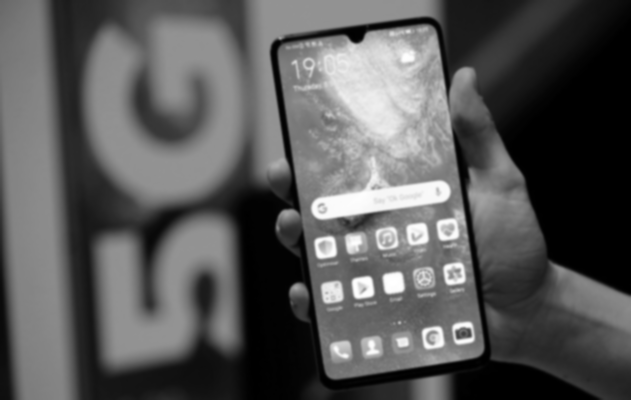

In [7]:
gray_image=cv2.GaussianBlur(src=gray_image, ksize=(5,5), sigmaX=0)
cv2_imshow(gray_image)

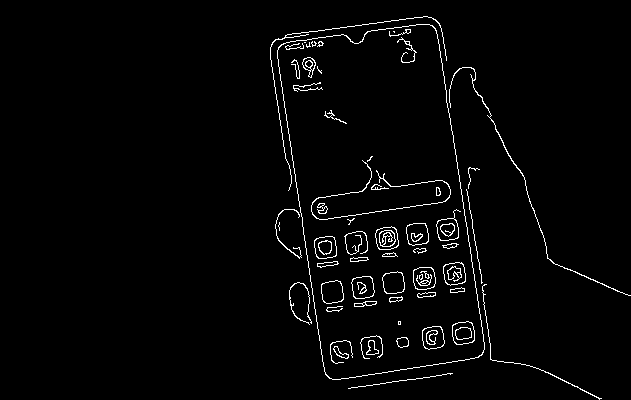

In [8]:
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges)

In [9]:
contours = cv2.findContours(image=edges.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

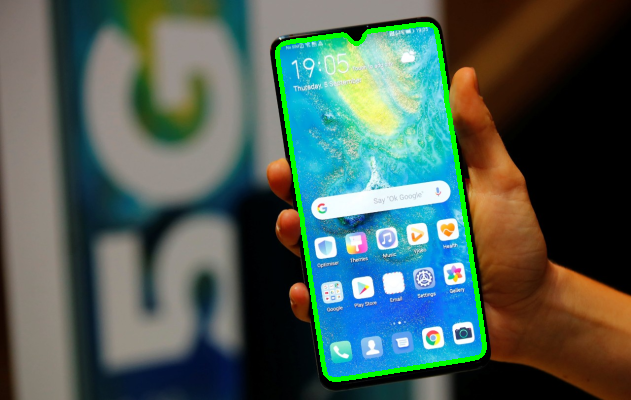

In [10]:
cnt1=cv2.drawContours(image=image.copy(), contours=[contours[0]], contourIdx=-1, color=(0, 255,0), thickness=3)
cv2_imshow(cnt1)

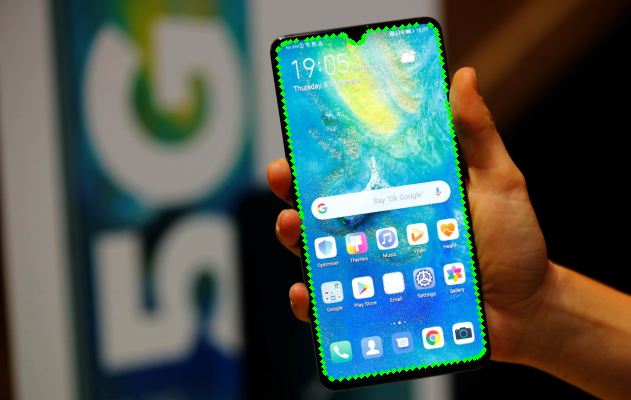

In [11]:
cnt2=cv2.drawContours(image=image.copy(), contours=contours[1], contourIdx=-1, color=(0,255,0), thickness=3)
cv2_imshow(cnt2)

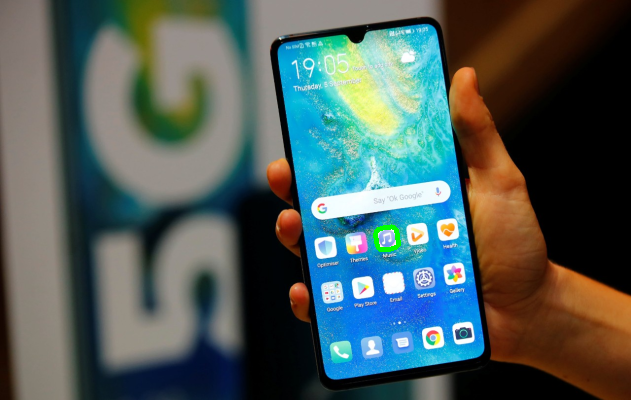

In [12]:
cnt2=cv2.drawContours(image=image.copy(), contours=[contours[2]], contourIdx=-1, color=(0,255,0), thickness=3)
cv2_imshow(cnt2)

In [14]:
screen_contour = None
for contour in contours:
  perimeter = cv2.arcLength(curve=contour, closed=True)
  approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

  if len(approx)==4:
    screen_contour=approx
    break

In [15]:
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

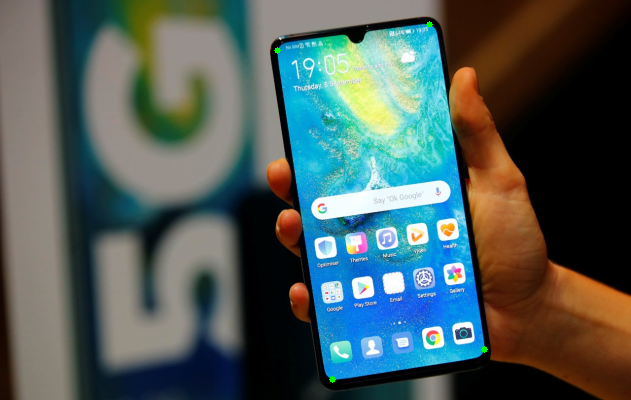

In [17]:
verticles = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0,255,0), thickness=6)
cv2_imshow(verticles)

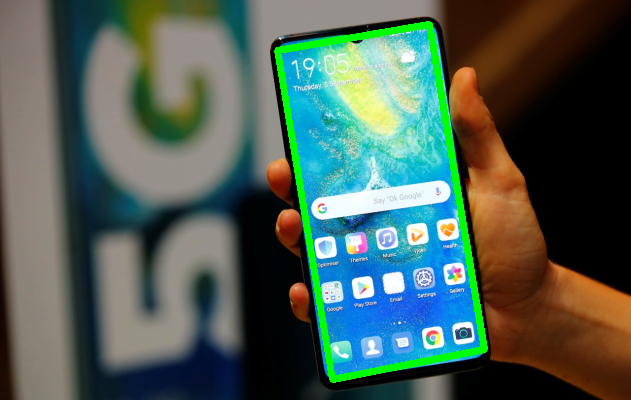

In [18]:
screen_contour= cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0,255,0), thickness=5)
cv2_imshow(screen_contour)